In [2]:
# for data analysis
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1 :

In [4]:
#read dataset
df = pd.read_csv("hyundai.csv")
display(df.head())
display(df.tail())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,51.4,2.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
4855,I30,2016,8680,Manual,25906,Diesel,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,44.8,1.6
4859,Tucson,2016,15999,Automatic,11472,Diesel,57.6,1.7


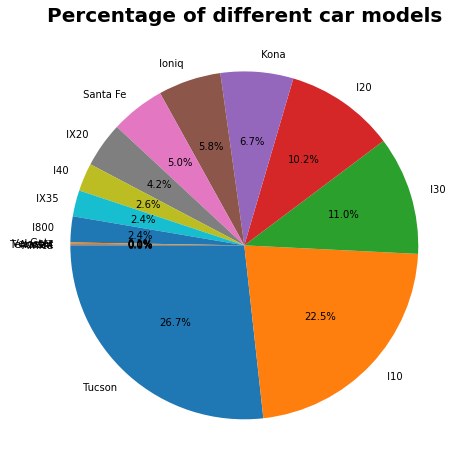

In [21]:
#define plot size
plt.figure(figsize=(15,8))
#creating piechart
df["model"].value_counts().plot(kind="pie", 
                                       autopct='%1.1f%%', 
                                       startangle=180)
#make the title clear and more readable
plt.title("Percentage of different car models",
          fontweight="bold",
          fontsize=20)
plt.ylabel("")
plt.show()

In [15]:
#manipulating "model" column for barchart
df_model = pd.DataFrame(df["model"].value_counts())
df_model = df_model.reset_index()
df_model = df_model.rename(columns={"index":"Model",
                                          "model":"no_of_cars"})

#get the car model percentages
df_model["% of cars"] = (df_model["no_of_cars"]/df.shape[0])*100

df_model = df_model.round(2)

display(df_model)

,Model,no_of_cars,% of cars
0,Tucson,1300,26.75
1,I10,1092,22.47
2,I30,536,11.03
3,I20,496,10.21
4,Kona,328,6.75
5,Ioniq,284,5.84
6,Santa Fe,245,5.04
7,IX20,204,4.20
8,I40,127,2.61
9,IX35,118,2.43


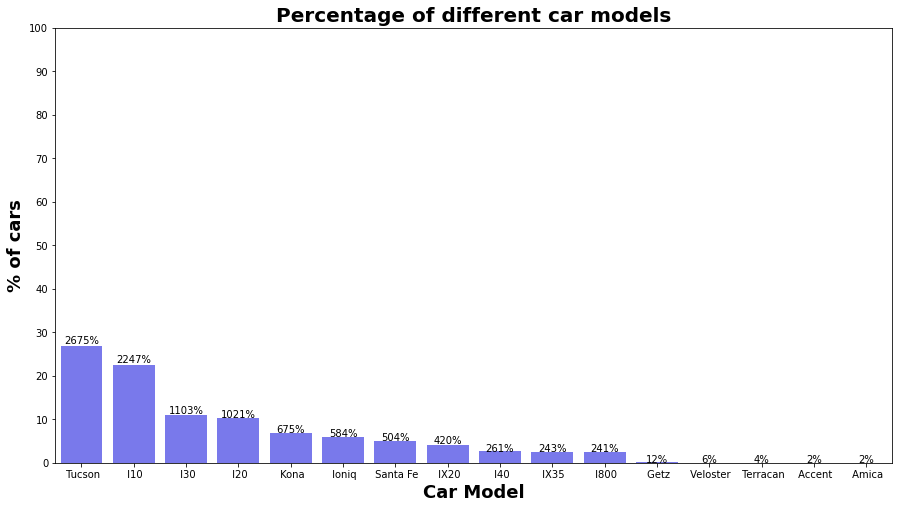

In [86]:
plt.figure(figsize=(15,8))
splot = sns.barplot(x="Model", 
            y="% of cars", 
            data=df_model, 
            color="blue",
            alpha=0.6)

#Annotation with percentage sign
for p in splot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    splot.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
    
plt.xlabel("Car Model",
          fontweight="bold",
          fontsize=18)

plt.ylabel("% of cars",
          fontweight="bold",
          fontsize=18)

plt.title("Percentage of different car models",
          fontweight="bold",
          fontsize=20)

plt.yticks(np.arange(0,101,10))
plt.show()

**Pie charts are less likely to be useful since they show proportions of a whole, and when the proportions are near to each other, as in the above pie chart, it can be difficult to tell if one slice is larger than another.**

**In this scenario, a bar chart is more useful. Bar charts have far more uses than pie charts. Because of the flexibility of a bar chart, it may be used to represent percentages, totals, counts, and a variety of other data, as long as  find a fair way to group the contents of the x-axis, whether by category or by time. For example, the above bar chart conveys more information in a more clear and straightforward manner than the pie chart.
So I think bar chart is better than pie chart in this scenerio**

## Part 2 :

**Scatter plot works for numeric columns. So first check which columns are numeric.**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   mpg           4860 non-null   float64
 7   engineSize    4860 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 303.9+ KB


**To check relationship between columns, scatter plot is used.**

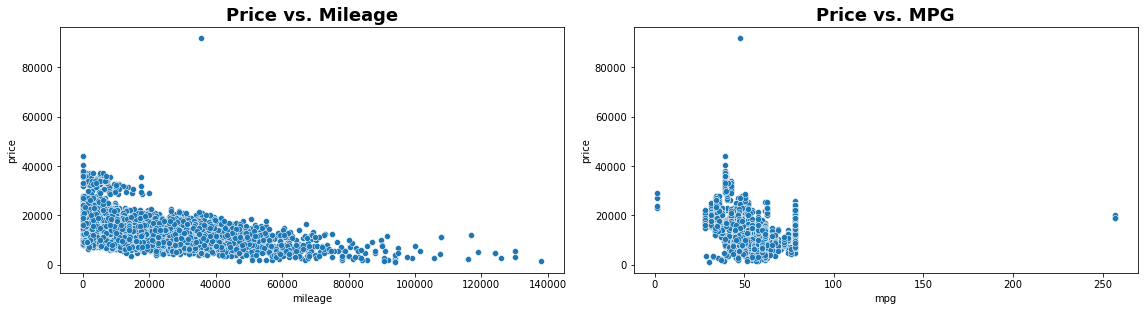

In [35]:
plt.figure(figsize=(16,8))

#price vs mileage scatter plot
plt.subplot(2, 2, 1)
sns.scatterplot(x="mileage", y="price", data=df)
#make the title more readable
plt.title('Price vs. Mileage', weight='bold').set_fontsize('18')

#price vs mpg scatter plot
plt.subplot(2, 2, 2)
sns.scatterplot(x="mpg", y="price", data=df)
#make the title more readable
plt.title('Price vs. MPG', weight='bold').set_fontsize('18')

plt.tight_layout()
plt.show()

**From the scatter plots above, there is a negative corrlation price and mileage and there is no meaningful relation between price and mpg.**

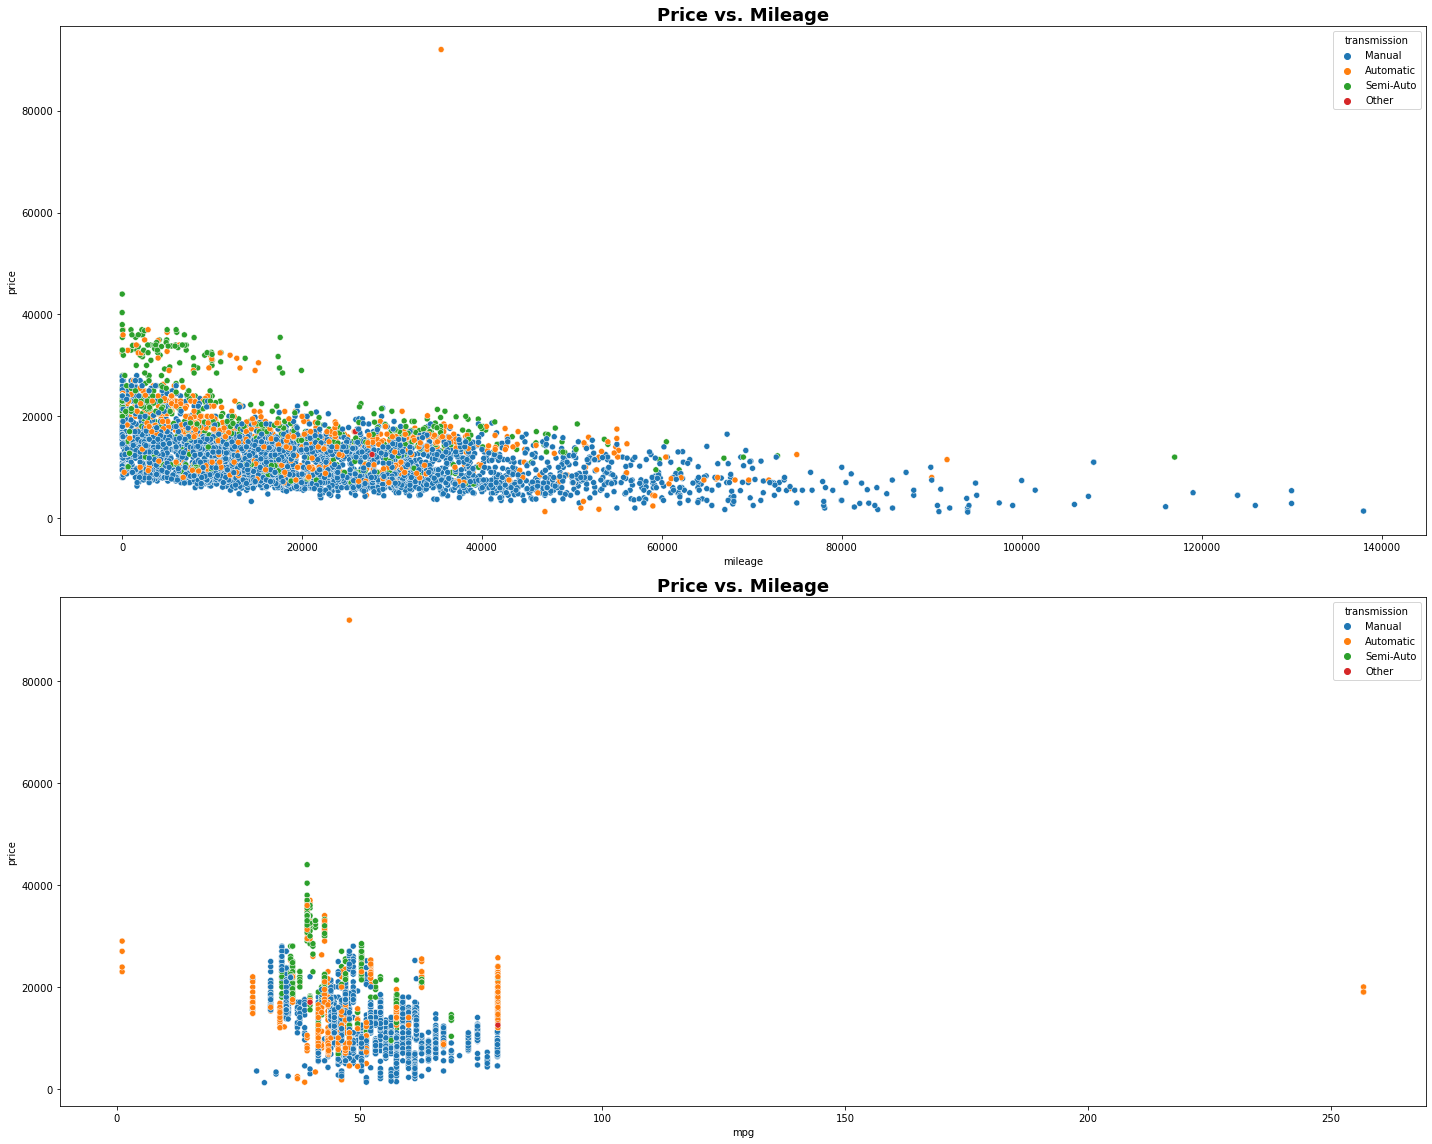

In [38]:
plt.figure(figsize=(20,16))

#Price vs. Mileage and hue =  transmission
plt.subplot(2, 1, 1)
sns.scatterplot(x="mileage", y="price", data=df, hue="transmission")
plt.title('Price vs. Mileage', weight='bold').set_fontsize('18')

#Price vs. MPG and hue =  transmission
plt.subplot(2, 1, 2)
sns.scatterplot(x="mpg", y="price", data=df, hue="transmission")
plt.title('Price vs. Mileage', weight='bold').set_fontsize('18')

plt.tight_layout()
plt.show()

**To find out relation with the "transmission" column. transmission column is used as a hue.**

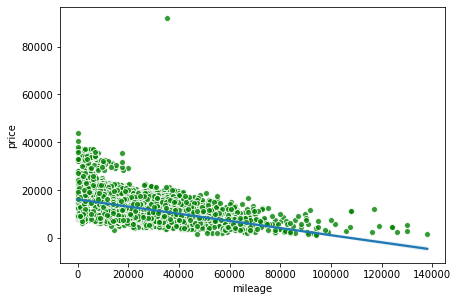

In [41]:
#Regression Plot
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 3)
sns.regplot(x="mileage", y="price", data=df, scatter_kws={"color":"green", "edgecolor":"white"})

plt.tight_layout()
plt.show()

**Regression plot makes the relation more clear to the observer.**

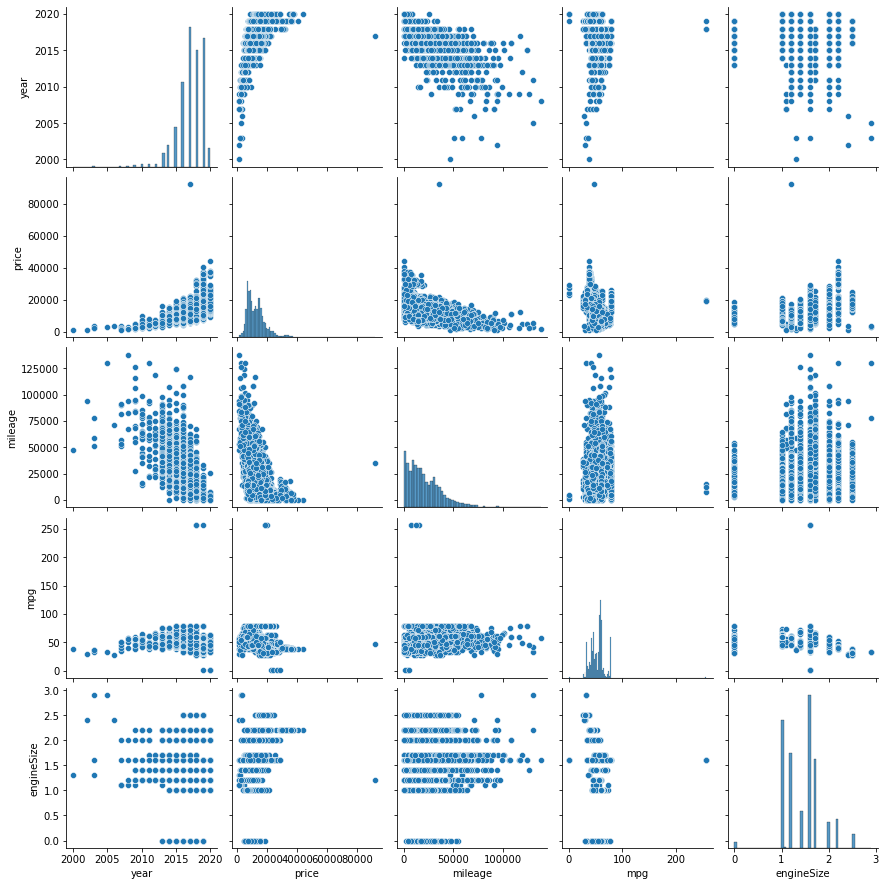

In [42]:
#pair plot
sns.pairplot(df) 
plt.show()

**To plot numeric multiple pairwise multivariate distributions in a dataset, pairplot is used.**

In [44]:
num_cols = []
#get all the columns except year and engineSize
#year and engineSize are not important feature for determinig 'price'
for col in df.columns:
    if df[col].dtypes != "O" and col != "year" and col != "engineSize":
        num_cols.append(col)

print(num_cols)

['price', 'mileage', 'mpg']


<Figure size 1440x720 with 0 Axes>

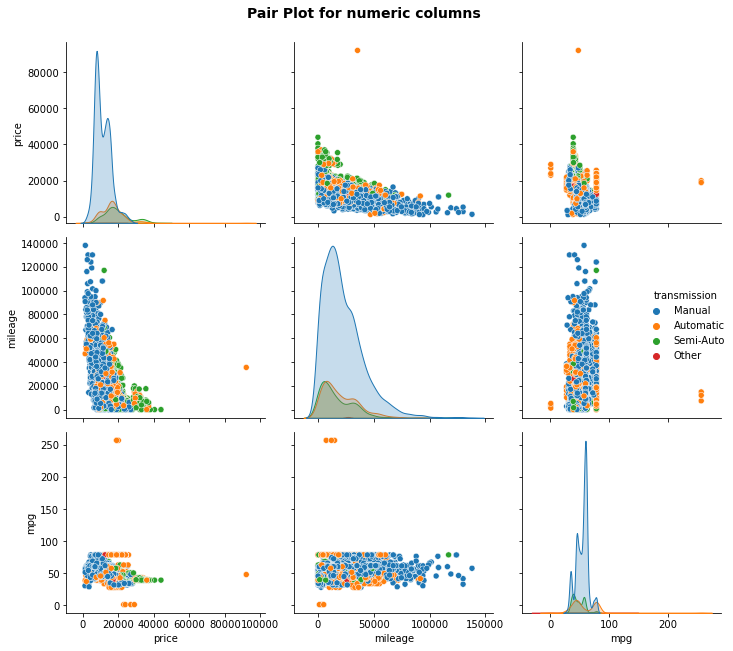

In [63]:
plt.figure(figsize=(20,10))
# create pairplot with the hue
pp = sns.pairplot(
    df,
    x_vars=num_cols,
    y_vars=num_cols,
    hue="transmission",
    height=3
)
pp.fig.suptitle("Pair Plot for numeric columns", y=1,weight='bold').set_fontsize('14')
plt.tight_layout()
plt.show()

**The pairs plot by itself often gives valuable insights. From these plots, it is clearly seen that price and mileage are negatively correlated showing that high mileage car price is low. While this plot alone can be useful in an analysis, it can  more valuable by coloring the figures based on a categorical variable such as transmission.**

## Part 3 :

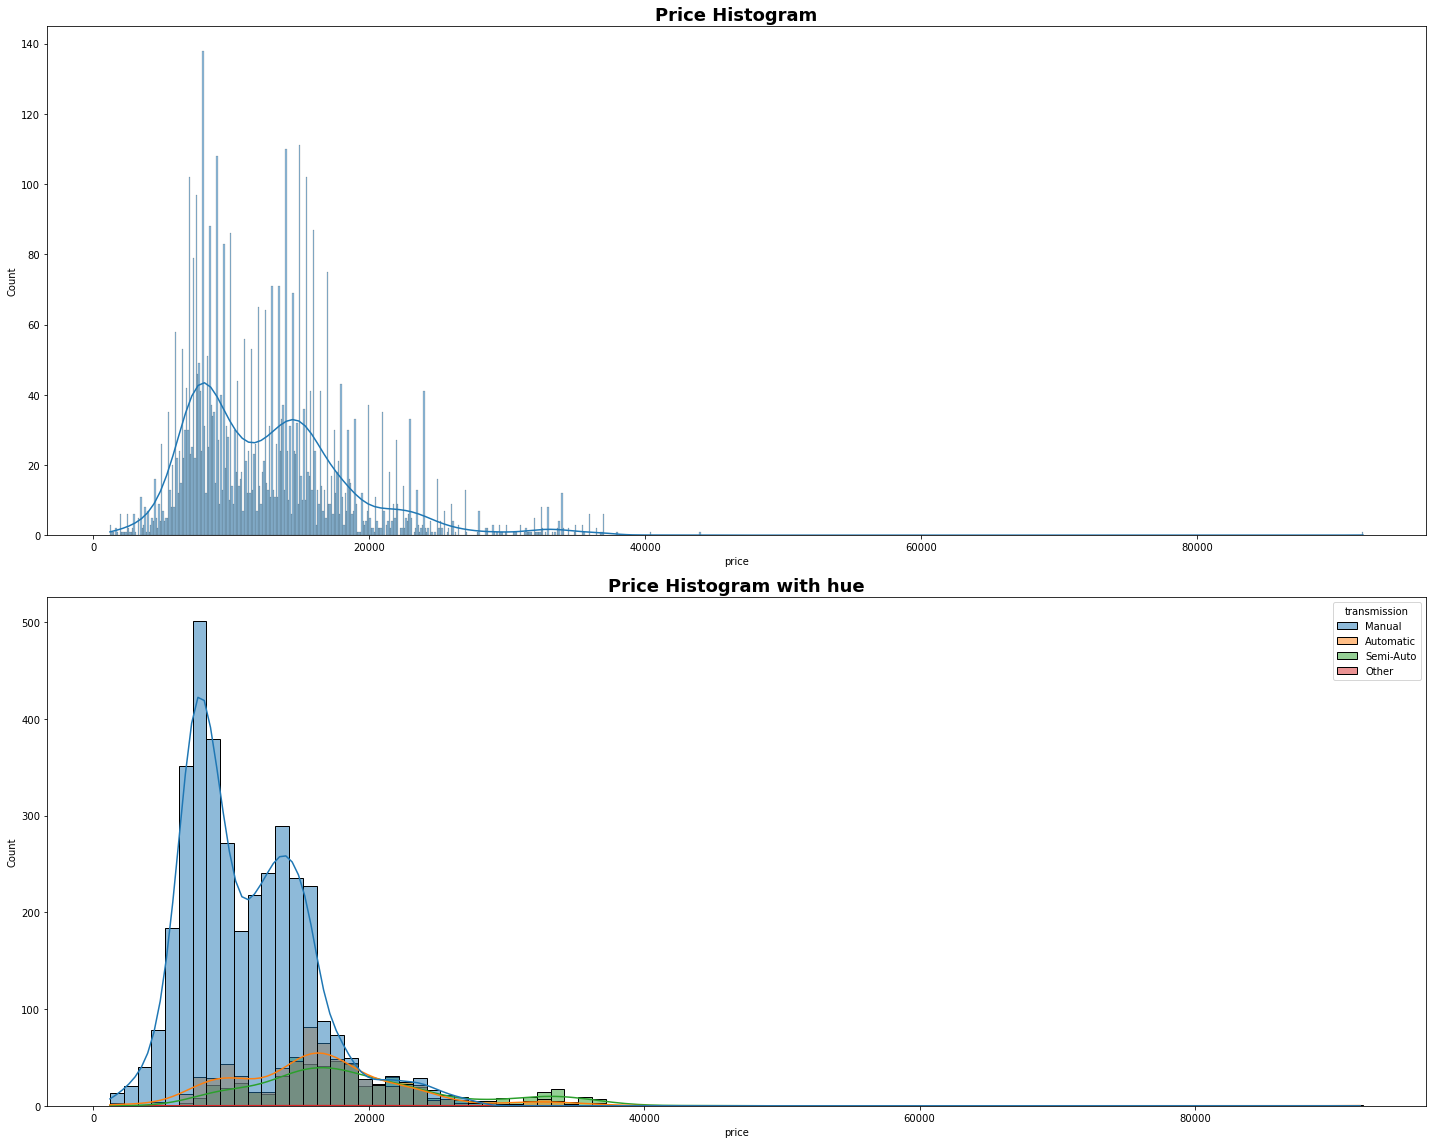

In [87]:
plt.figure(figsize=(20,16))

plt.subplot(2,1,1)
sns.histplot(x="price", data=df, binwidth=100, kde=True)
plt.title('Price Histogram', weight='bold').set_fontsize('18')


plt.subplot(2,1,2)
sns.histplot(x="price", data=df, binwidth=1000, kde=True, hue="transmission")
plt.title('Price Histogram with hue', weight='bold').set_fontsize('18')

plt.tight_layout()
plt.show()

**Histogram helps to visualize the distribution of the data. From the above histograms,how much cars are distributed in different price range.**

In [68]:
#box plot work for numeric columns

num_cols = []
#get numeric columns
for col in df.columns:
    if df[col].dtypes != "O" and col != "year":
        num_cols.append(col)

print(num_cols)

['price', 'mileage', 'mpg', 'engineSize']


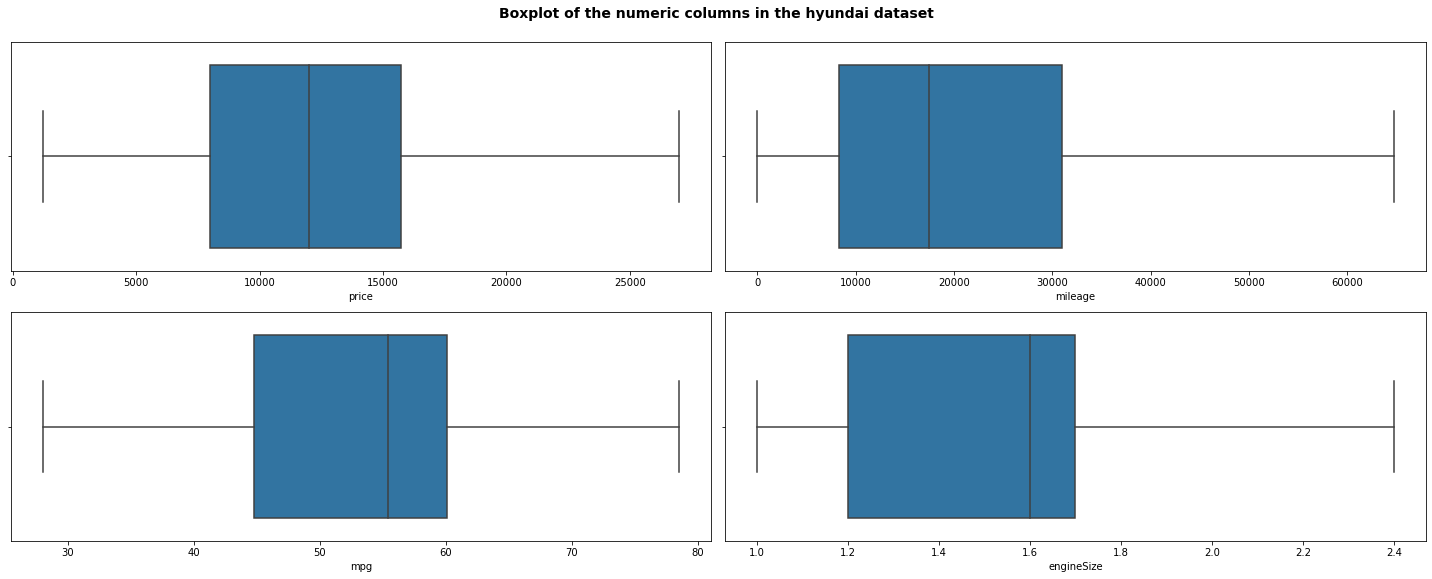

In [84]:
#create Box plot
plt.figure(figsize=(20,8))

for index in range(len(num_cols)):
    plt.subplot(2,2,index+1)
    sns.boxplot(x=num_cols[index], data=df, showfliers=False)

plt.suptitle("Boxplot of the numeric columns in the hyundai dataset", y=1,weight='bold').set_fontsize('14')
plt.tight_layout()
plt.show()

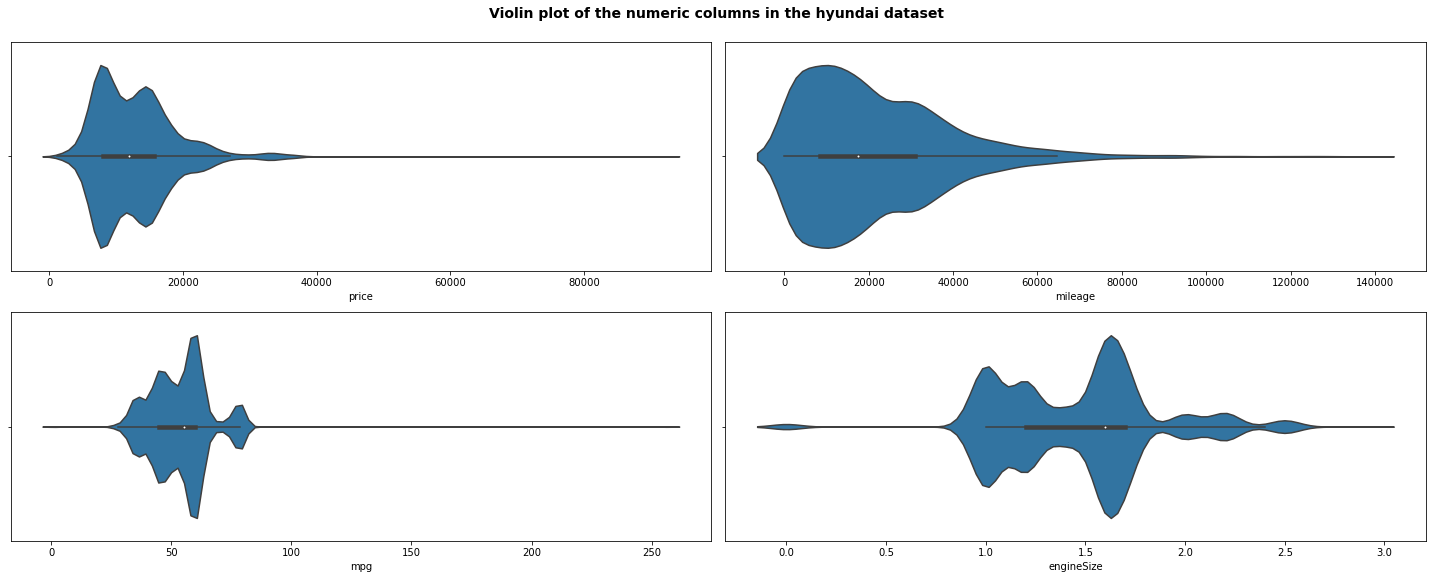

In [85]:
#create violin plot
plt.figure(figsize=(20,8))
for index in range(len(num_cols)): 
    plt.subplot(2,2,index+1)
    sns.violinplot(x=num_cols[index], data=df, showfliers=False)

plt.suptitle("Violin plot of the numeric columns in the hyundai dataset", y=1,weight='bold').set_fontsize('14')
plt.tight_layout()
plt.show()

**Box plots show medians, ranges and variabilities effectively but don't carry any information about density. On the other hand, violin plots carry all the information that a box plot would and also carry density information.**